In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df = df[['tenure','MonthlyCharges','TotalCharges','Contract','InternetService','PaymentMethod','Churn']]

In [7]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod,Churn
0,1,29.85,29.85,Month-to-month,DSL,Electronic check,No
1,34,56.95,1889.5,One year,DSL,Mailed check,No
2,2,53.85,108.15,Month-to-month,DSL,Mailed check,Yes
3,45,42.30,1840.75,One year,DSL,Bank transfer (automatic),No
4,2,70.70,151.65,Month-to-month,Fiber optic,Electronic check,Yes


In [9]:
df.isnull().sum()

tenure             0
MonthlyCharges     0
TotalCharges       0
Contract           0
InternetService    0
PaymentMethod      0
Churn              0
dtype: int64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_19212\4186322231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
C:\Users\harsh\AppData\Local\Temp\ipykernel_19212\4186322231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [11]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod,Churn
0,1,29.85,29.85,Month-to-month,DSL,Electronic check,No
1,34,56.95,1889.50,One year,DSL,Mailed check,No
2,2,53.85,108.15,Month-to-month,DSL,Mailed check,Yes
3,45,42.30,1840.75,One year,DSL,Bank transfer (automatic),No
4,2,70.70,151.65,Month-to-month,Fiber optic,Electronic check,Yes


In [12]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

C:\Users\harsh\AppData\Local\Temp\ipykernel_19212\3576960184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'Yes':1,'No':0})


In [13]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod,Churn
0,1,29.85,29.85,Month-to-month,DSL,Electronic check,0
1,34,56.95,1889.50,One year,DSL,Mailed check,0
2,2,53.85,108.15,Month-to-month,DSL,Mailed check,1
3,45,42.30,1840.75,One year,DSL,Bank transfer (automatic),0
4,2,70.70,151.65,Month-to-month,Fiber optic,Electronic check,1


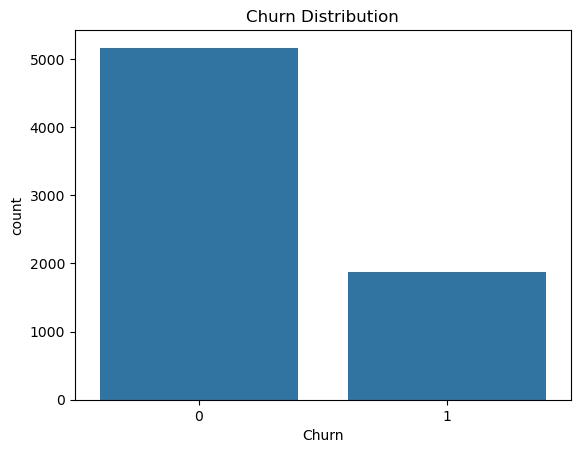

In [14]:
sns.countplot(x='Churn',data=df)
plt.title("Churn Distribution")
plt.show()

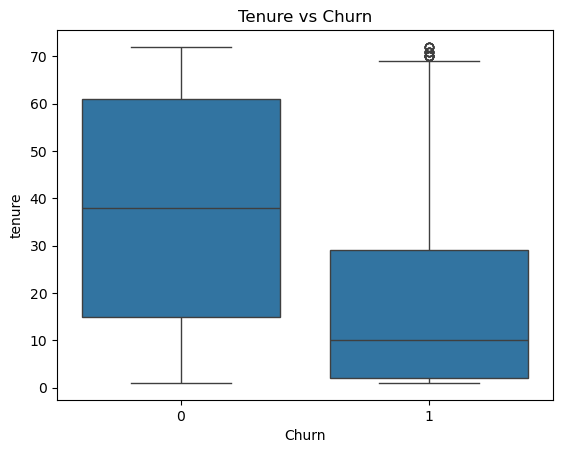

In [15]:
sns.boxplot(x='Churn',y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

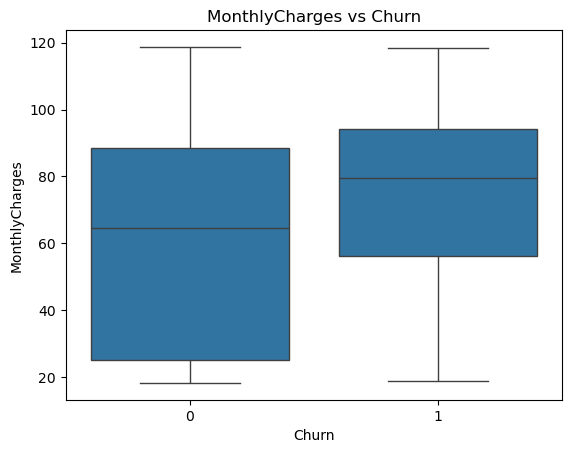

In [16]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title("MonthlyCharges vs Churn")
plt.show()

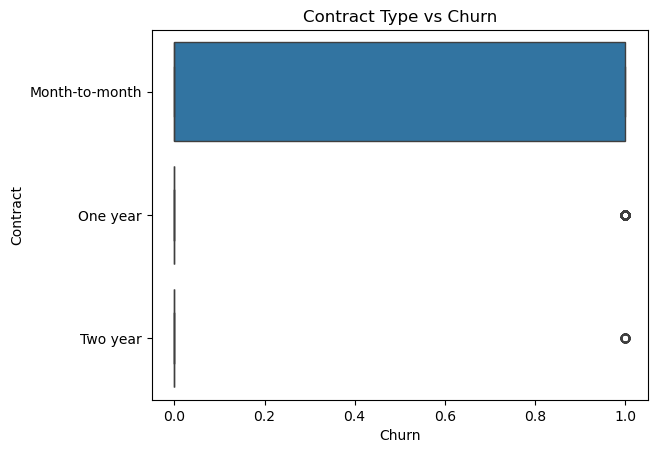

In [17]:
sns.boxplot(x='Churn',y='Contract',data=df)
plt.title("Contract Type vs Churn")
plt.show()

In [20]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [21]:
X = df_encoded.drop('Churn',axis=1)
y = df_encoded['Churn']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_pred = model.predict(X_test)

In [29]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(1407,))

In [33]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7924662402274343
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



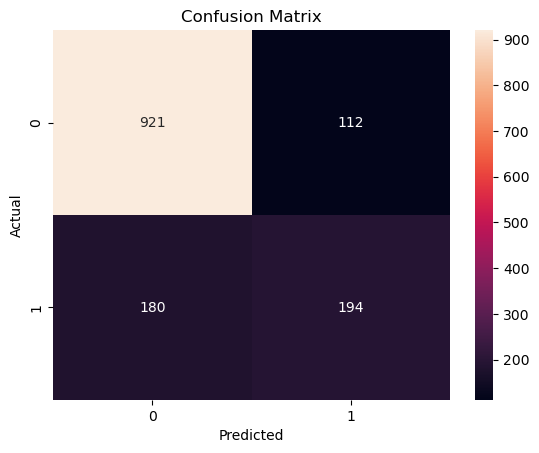

In [37]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
import pickle

pickle.dump(model,open("churn_model.pkl","wb"))
pickle.dump(X.columns,open("model_columns.pkl","wb"))